In [1]:
!pip install pandas-profiling==3.1.0

     |████████████████████████████████| 261 kB 7.5 MB/s 
     |████████████████████████████████| 10.1 MB 31.4 MB/s 
     |████████████████████████████████| 3.1 MB 61.9 MB/s 
     |████████████████████████████████| 303 kB 72.9 MB/s 
     |████████████████████████████████| 675 kB 46.5 MB/s 
     |████████████████████████████████| 62 kB 950 kB/s 
     |████████████████████████████████| 596 kB 42.1 MB/s 
     |████████████████████████████████| 102 kB 11.6 MB/s 
     |████████████████████████████████| 812 kB 59.1 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=568c5ac9767bb21f5e08eb4a8dd13c41ec19ae402bf4aa3835eaa8cc37c9e0fa
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=dbab37b3f456eee397564fe41d16b0cbb250e6cefa37e2a5b62d30ac55ee01e7
  

In [2]:
!pip install association_metrics

  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3952 sha256=0f2bdd99b64855bca21e15600ac15bf1cb0fd82ae33f69f7e216f80ac74b9900
  Stored in directory: /root/.cache/pip/wheels/2d/1e/07/287b993a07cc41eade32a9b863d6d4686f985d72344a9e0911
Successfully built association-metrics


In [3]:
!pip install phik

In [8]:
# Import các thư viện
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import association_metrics as am
import phik

In [5]:
# Đọc file  
file = pd.read_excel("/content/HR Attrition.xlsm")
file

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
# Pandas Profiling Report
profile = ProfileReport(file)
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Ý nghĩa của các attributes** - chỉ giải thích những attributes khi tên của nó chưa được tường minh hoặc có thông tin khác

**BusinessTravel**: mức độ thường xuyên đi công tác

**HourlyRate, DailyRate, MonthlyRate**: mức lương theo giờ, ngày, tháng

**Education**: trình độ học vấn

**EmployeeCount**

**EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction**: mức độ hài lòng với môi trường làm việc, công việc, mối quan hệ

**JobInvolvement**: mức độ tham gia vào công việc

**JobLevel**: trình độ công việc

**NumCompaniesWorked**: số lượng công ty đã từng làm việc (không tính công ty hiện tại)

**Overtime**: làm việc tăng ca

**PercentSalaryHike**: tỉ lệ lương tăng lên

**PerformanceRating**: đánh giá năng lực

**StandardHours**: giờ công chuẩn

**StockOptionLevel**



In [9]:
# List Attrition: cột nhãn
y = [value for value in file['Attrition']]

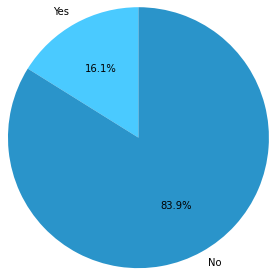

In [10]:
# Phân tích Attrition
yes = [i for i in y if i == 'Yes']
no = [i for i in y if i == 'No']
data = [len(yes), len(no)]
labels = ['Yes', 'No']
color = ['#4acaff', '#2a94ca']
plt.pie(data, labels = labels, startangle=90, autopct='%1.1f%%', colors=color, radius=1.5)
plt.show()

In [11]:
# Check if null
file.isnull().values.any()

False

In [12]:
# List các đặc trưng có giá trị số (numeric)
quantitative = [attribute for attribute in file.columns if file[attribute].dtypes != 'object']
print(len(quantitative))

26


==> Số đặc trưng có giá trị số là 26


In [44]:
# List các đặc trưng có giá trị khác số (categorical, boolean)
qualitative = [attribute for attribute in file.columns if file[attribute].dtypes == 'object']
qualitative.remove('Attrition')
print(len(qualitative))

8


==> Số đặc trưng có giá trị khác số là 8



**Một số dữ liệu có giá trị định lượng là dữ liệu định tính được mã hóa:**

**Education** 

{1:'Bellow College', 2:'College', 3:'Bachelor', 4:'Master', 5:'Doctor'}

**EnvironmentSatisfaction**

{1:'Low', 2:'Medium', 3:'High', 4:'Very High'}

**JobInvolvement**

{1:'Low', 2:'Medium', 3:'High', 4:'Very High'}

**JobLevel**

**JobSatisfaction**

{1:'Low', 2:'Medium', 3:'High', 4:'Very High'}

**PerformanceRating**

{1:'Low', 2:'Good', 3:'Excellent', 4:'Outstanding'}

**RelationshipSatisfaction**

{1:'Low', 2:'Medium', 3:'High', 4:'Very High'}

**StockOptionLevel**

**WorkLifeBalance**

{1:'Bad', 2:'Good', 3:'Better', 4:'Best'}


In [14]:
# List các attributes trên
list = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel','WorkLifeBalance'] 

In [45]:
# Chuyển các attributes trong list
qualitative.extend(list)
for i in list: quantitative.remove(i)
print(len(qualitative))
print(len(quantitative))

ValueError: ignored

Lúc này ta có: 
*   17 giá trị định tính (qualitative)
*   17 giá trị định lượng (quantitative)

**QUANTITATIVE**


In [16]:
# Basic descriptive statistic with 'quantitative'
file[quantitative].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0


In [17]:
# additional function
def des_sta(x):
  standardError = x.sem()
  median = x.median()
  mode = x.mode()[0]
  variance = x.var()
  kurt = x.kurt()
  skew = x.skew()  
  lst = [standardError, median, mode, variance, kurt, skew]
  return lst

def dict_des_sta(x):
  dict = {}
  for i in x:
    dict[i] = des_sta(file[i])
  return dict

def description(x):
  lst = ['standardError', 'median', 'mode', 'variance', 'kurtosis', 'skewness']
  df = pd.DataFrame(dict_des_sta(x), index=lst)
  return df

In [18]:
# additional descriptive statistic
add_df = description(quantitative)
add_df.T

,standardError,median,mode,variance,kurtosis,skewness
Age,0.238269,36.0,35.0,8.345505e+01,-0.404145,0.413286
DailyRate,10.524335,802.0,691.0,1.628196e+05,-1.203823,-0.003519
DistanceFromHome,0.211443,7.0,2.0,6.572125e+01,-0.224833,0.958118
EmployeeCount,0.000000,1.0,1.0,0.000000e+00,0.000000,0.000000
EmployeeNumber,15.702015,1020.5,1.0,3.624333e+05,-1.223179,0.016574
HourlyRate,0.530233,66.0,66.0,4.132856e+02,-1.196398,-0.032311
MonthlyIncome,122.793054,4919.0,2342.0,2.216486e+07,1.005233,1.369817
MonthlyRate,185.646285,14235.5,4223.0,5.066288e+07,-1.214956,0.018578
NumCompaniesWorked,0.065153,2.0,1.0,6.240049e+00,0.010214,1.026471
PercentSalaryHike,0.095459,14.0,11.0,1.339514e+01,-0.300598,0.821128


Dòng *count* : đếm số giá trị không bị khuyết (missing)

**==> Các attributes không có giá trị bị khuyết**

*mean*: trung bình cộng

*std*: standard derivative, độ lệch chuẩn

*min*: giá trị nhỏ nhất

*25%*: Q1, First quartile, 25% percentile, median of the upper half of data 

*50%*: Q2, Second quartile, 50% percentile, median of the whole data 

*75%*: Q3, Third quartile, 75% percentile, median of the lower half data

*max*: giá trị lớn nhất

*standardError*: sai số chuẩn

*median*: trung vị

*mode*: yếu vị

*variance*: phương sai

*kurtosis*: độ nhọn

*skewness*: độ lệch, độ bất đối xứng

*'EmployeeCount'* **và** *'StandardHours'* **chỉ có một giá trị duy nhất xuyên suốt 1470 mẫu ==> không có giá trị về thông tin**

*'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'* **có giá trị min=0 ==> Vì giá trị của data được đo trên đơn vị *năm (years)* nên giá trị min=0 là có thể**


In [19]:
# Loại bỏ 2 attributes 'EmployeeCount' và 'StandardHours'
quantitative.remove('EmployeeCount')
quantitative.remove('StandardHours')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1436d76610>,
      dtype=object)

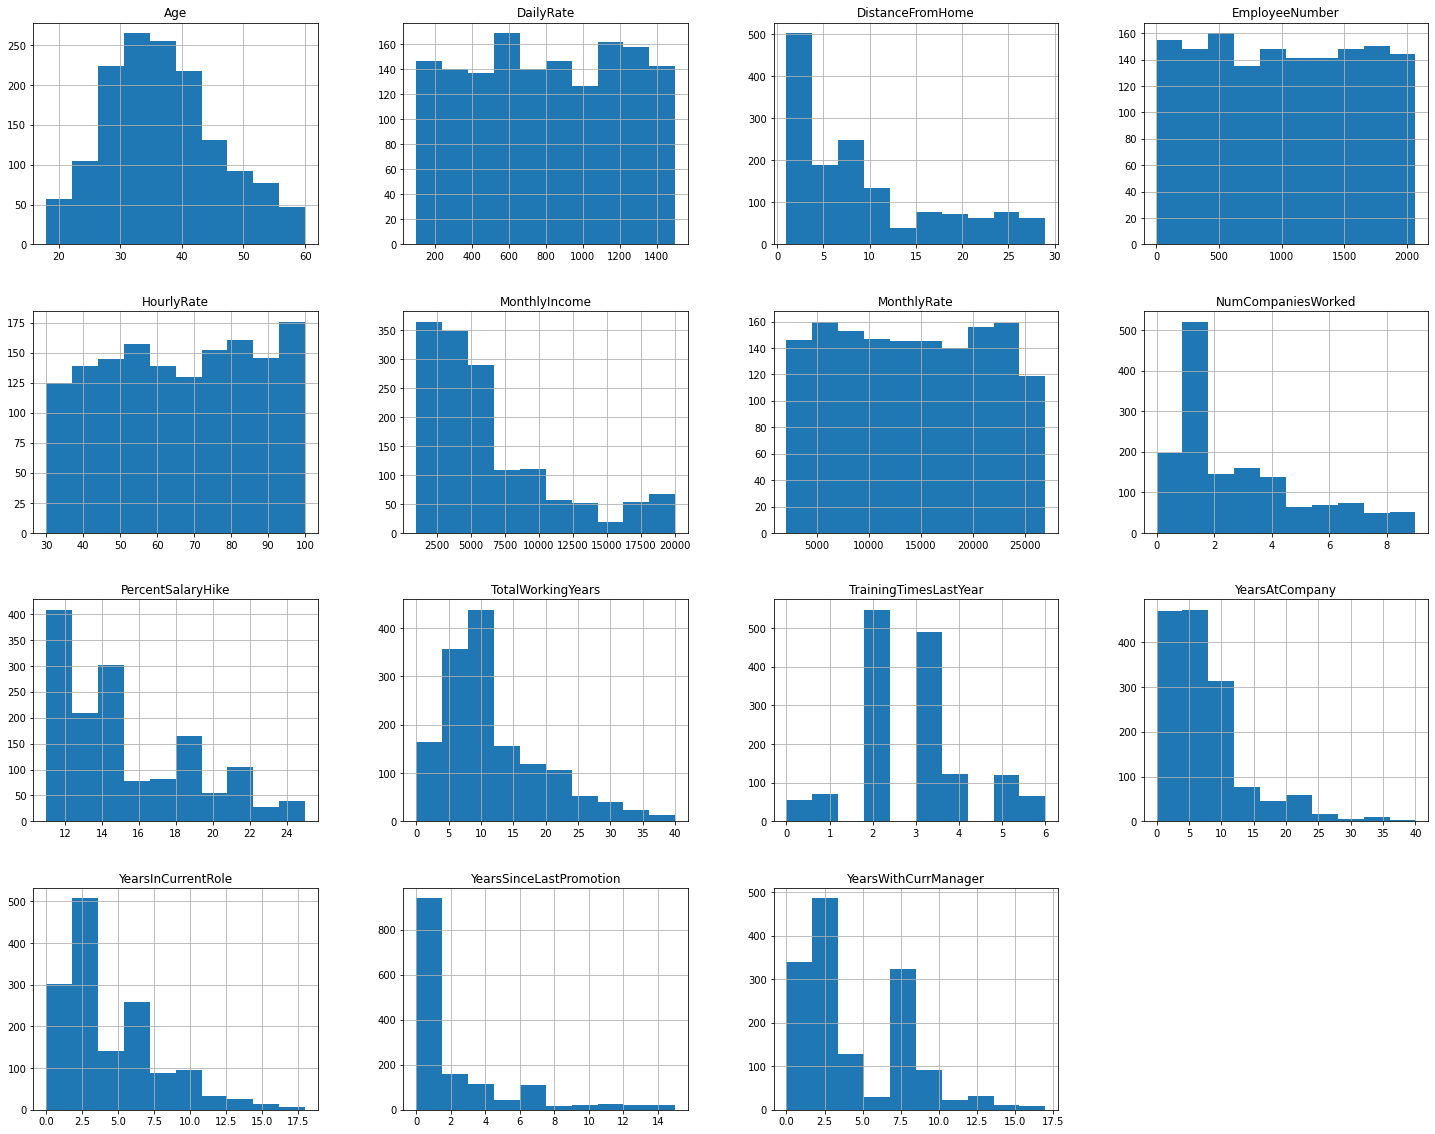

In [20]:
# Quick and overview visualization with histogram of 'quantitative'
file[quantitative].hist(bins = 10, figsize=(25, 20))

*'DailyRate', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate'* **có phân phối tương đối đều**

**EmployeeNumber**: min=1, max=2068, n=1470 ==> vì *'EmployeeNumber'* là mã nhân viên nên, không hoàn toàn liên quan đến khả năng sẽ nghỉ việc của nhân viên, có giá trị unique ==> **lược bỏ 'EmployeeNumber'**

**_Rate**: là các mức lương đơn vị theo giờ, ngày, tháng

có 71 mức lương theo giờ khác nhau,
có 886 mức lương theo ngày khác nhau,
có 1427 mức lương theo tháng khác nhau

(sử dụng method pandas.Series.unique())

**Các attributes còn lại đều có phân phối lệch phải (đuôi phải dài)**

In [21]:
# Eliminate 'EmployeeNumber'
quantitative.remove('EmployeeNumber')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


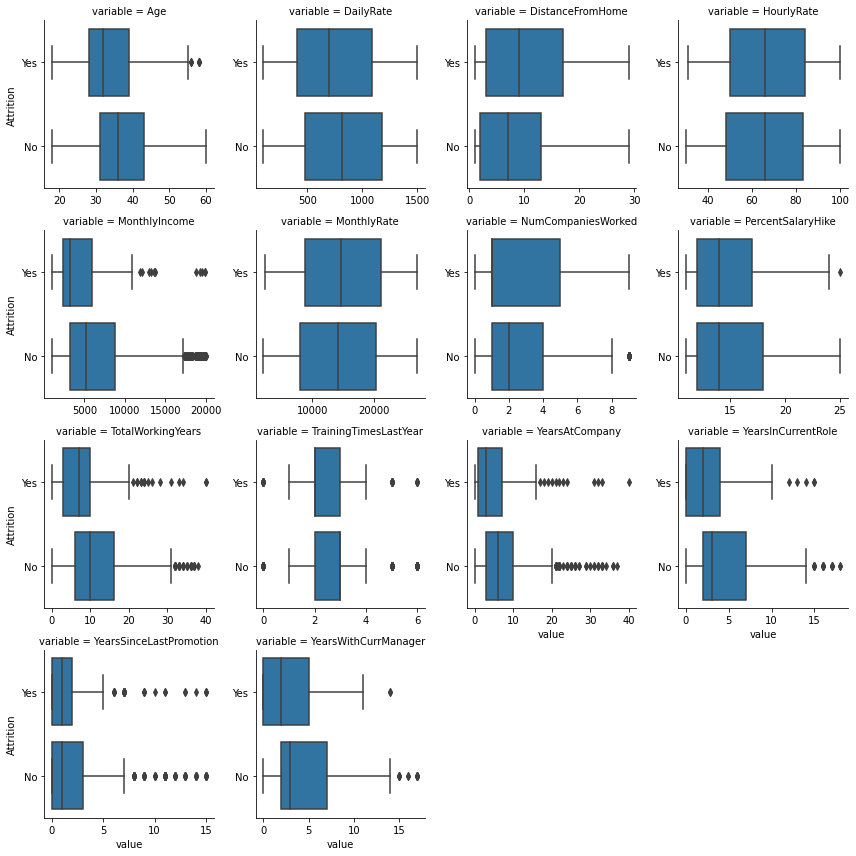

In [22]:
# Visualization of the relationships between Attrition and each feature in 'quantitative'
f = pd.melt(file, id_vars=['Attrition'], value_vars=quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(sns.boxplot, 'value', 'Attrition')

Trong góc nhìn xét từng attribute với 'Attrition' dưới biểu đồ Box plot, các attributes có chứa outliers bao gồm:  

*'Age', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'*

In [23]:
eliminate = qualitative.copy()
eliminate.extend(['EmployeeNumber', 'EmployeeCount', 'StandardHours'])
print(eliminate)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'EmployeeNumber', 'EmployeeCount', 'StandardHours']


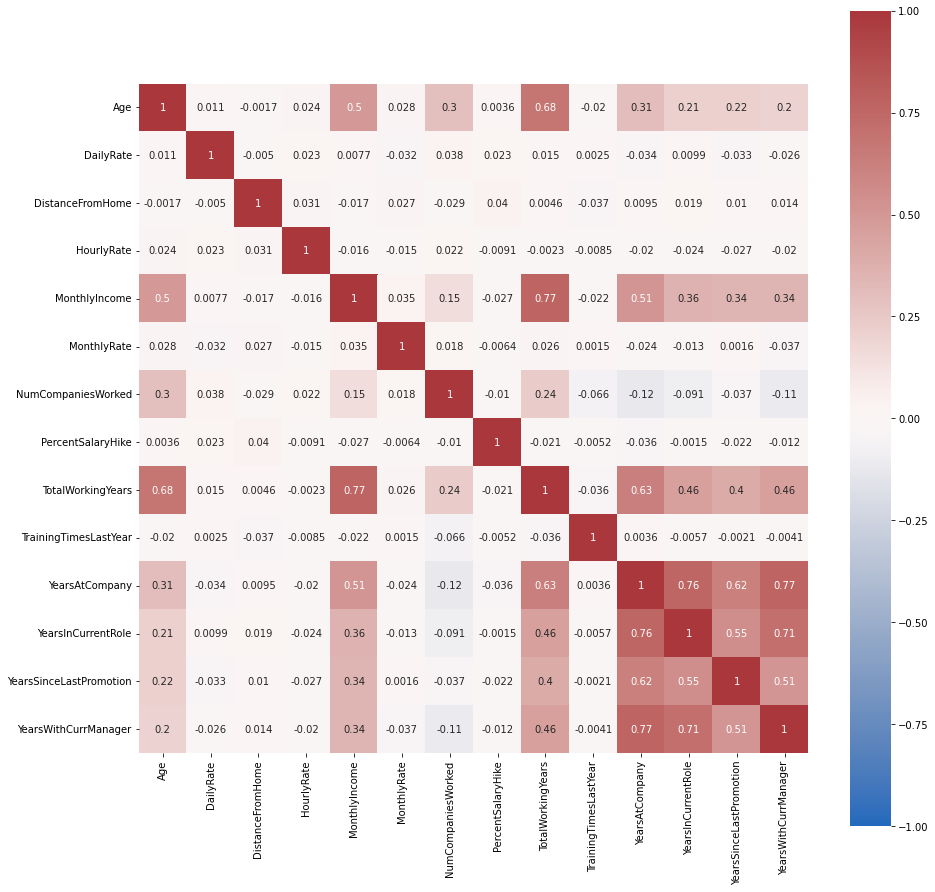

In [24]:
# Correlations giữa các đặc trưng định lượng
df = file.drop(columns=eliminate, axis=1)
cmap = sns.color_palette("vlag", as_cmap = True)
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(method = 'pearson'), annot = True, vmin = -1, vmax = 1, square = True, cmap = cmap)

In [25]:
# Eliminate 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'
quantitative.remove('YearsAtCompany')
quantitative.remove('YearsInCurrentRole')
quantitative.remove('YearsWithCurrManager')
print(len(quantitative))

11


**Số lượng đặc trưng định lượng còn 11**

**QUALITATIVE**

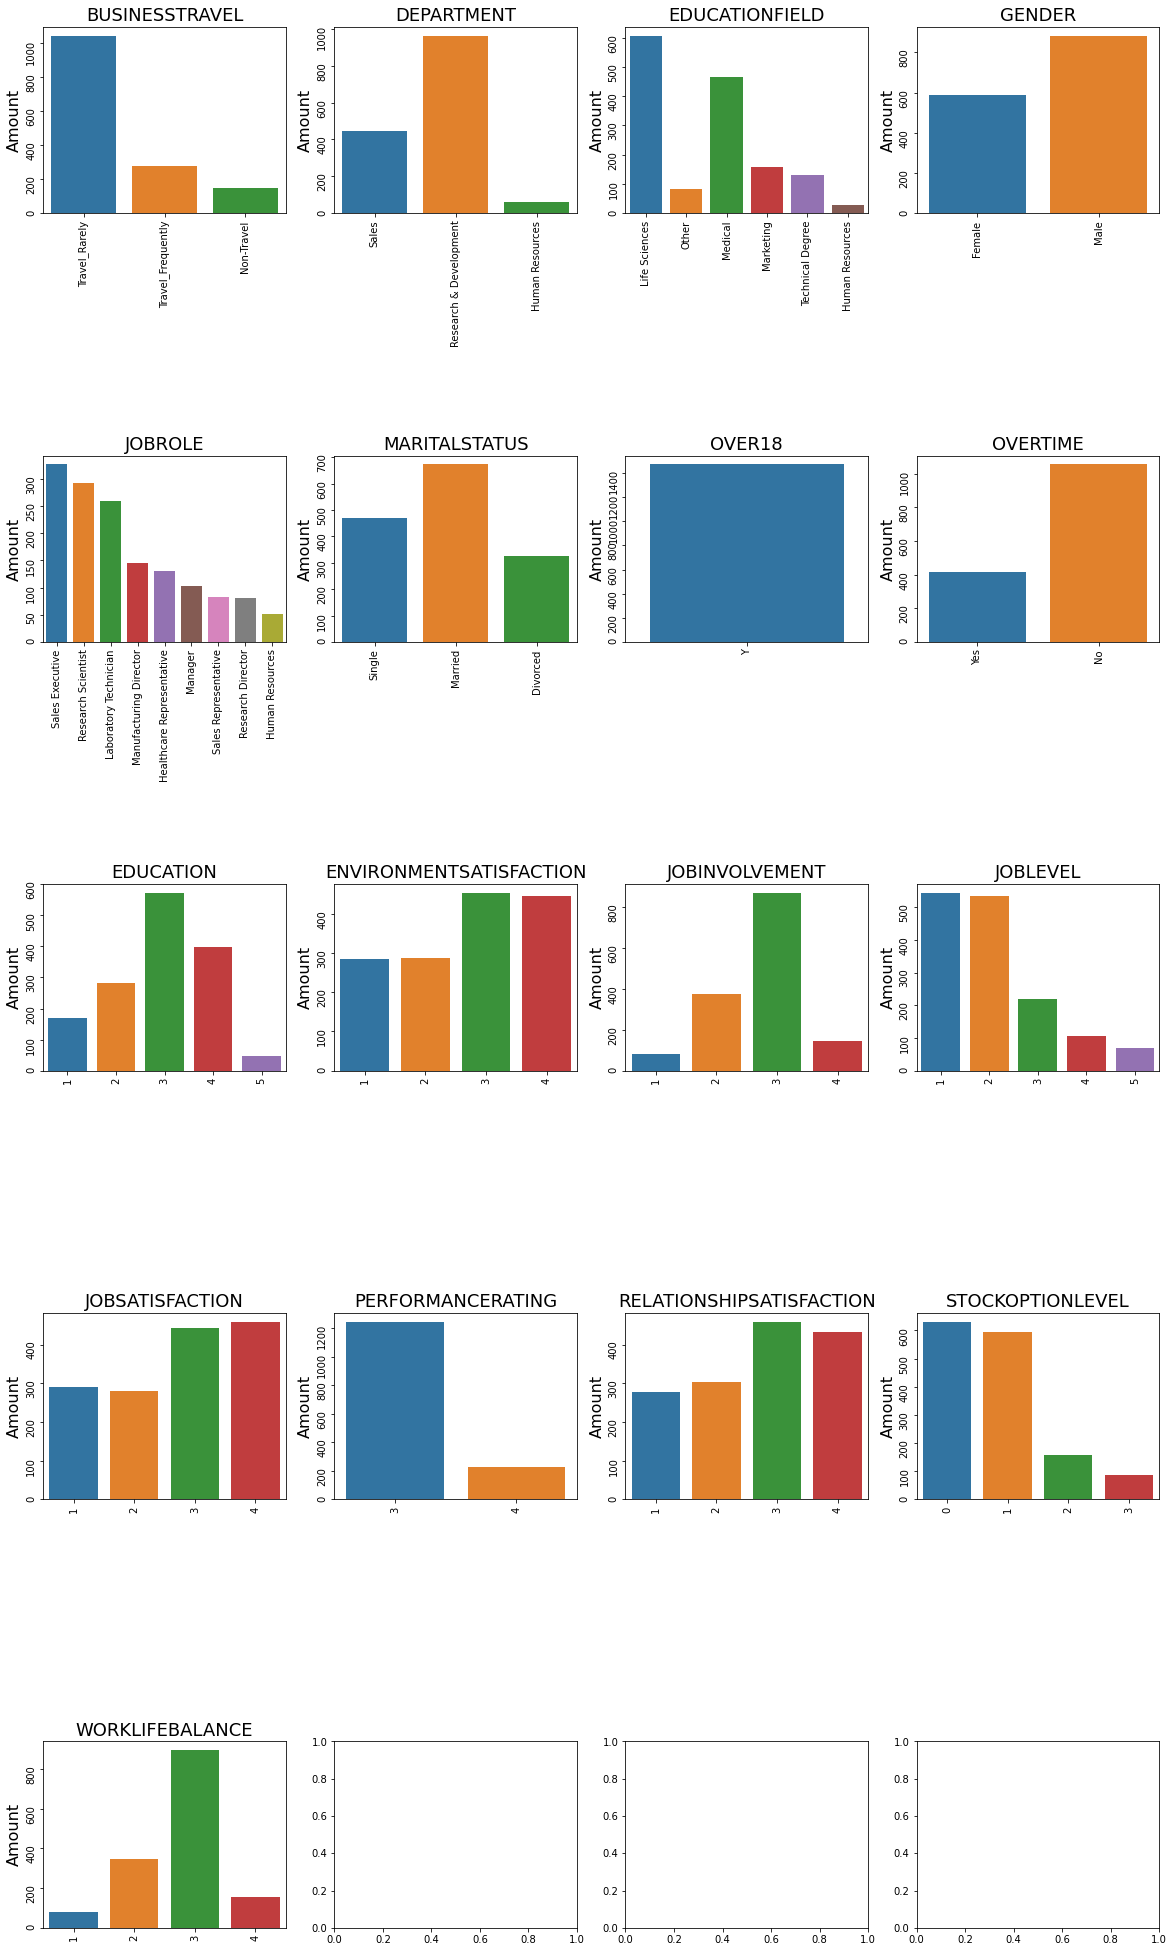

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,30))
fig.subplots_adjust(hspace=1.3, bottom=0)

for ax, catplot in zip(axes.flatten(), qualitative):
        sns.countplot(x=catplot, data=file, ax=ax)
        ax.set_title(catplot.upper(), fontsize=18)
        ax.set_ylabel('Amount', fontsize=16)
        ax.set_xlabel('')
        ax.tick_params(labelrotation=90)

In [50]:
# Eliminate 'Over18'
qualitative.remove('Over18')

Số lượng qualitative còn 16

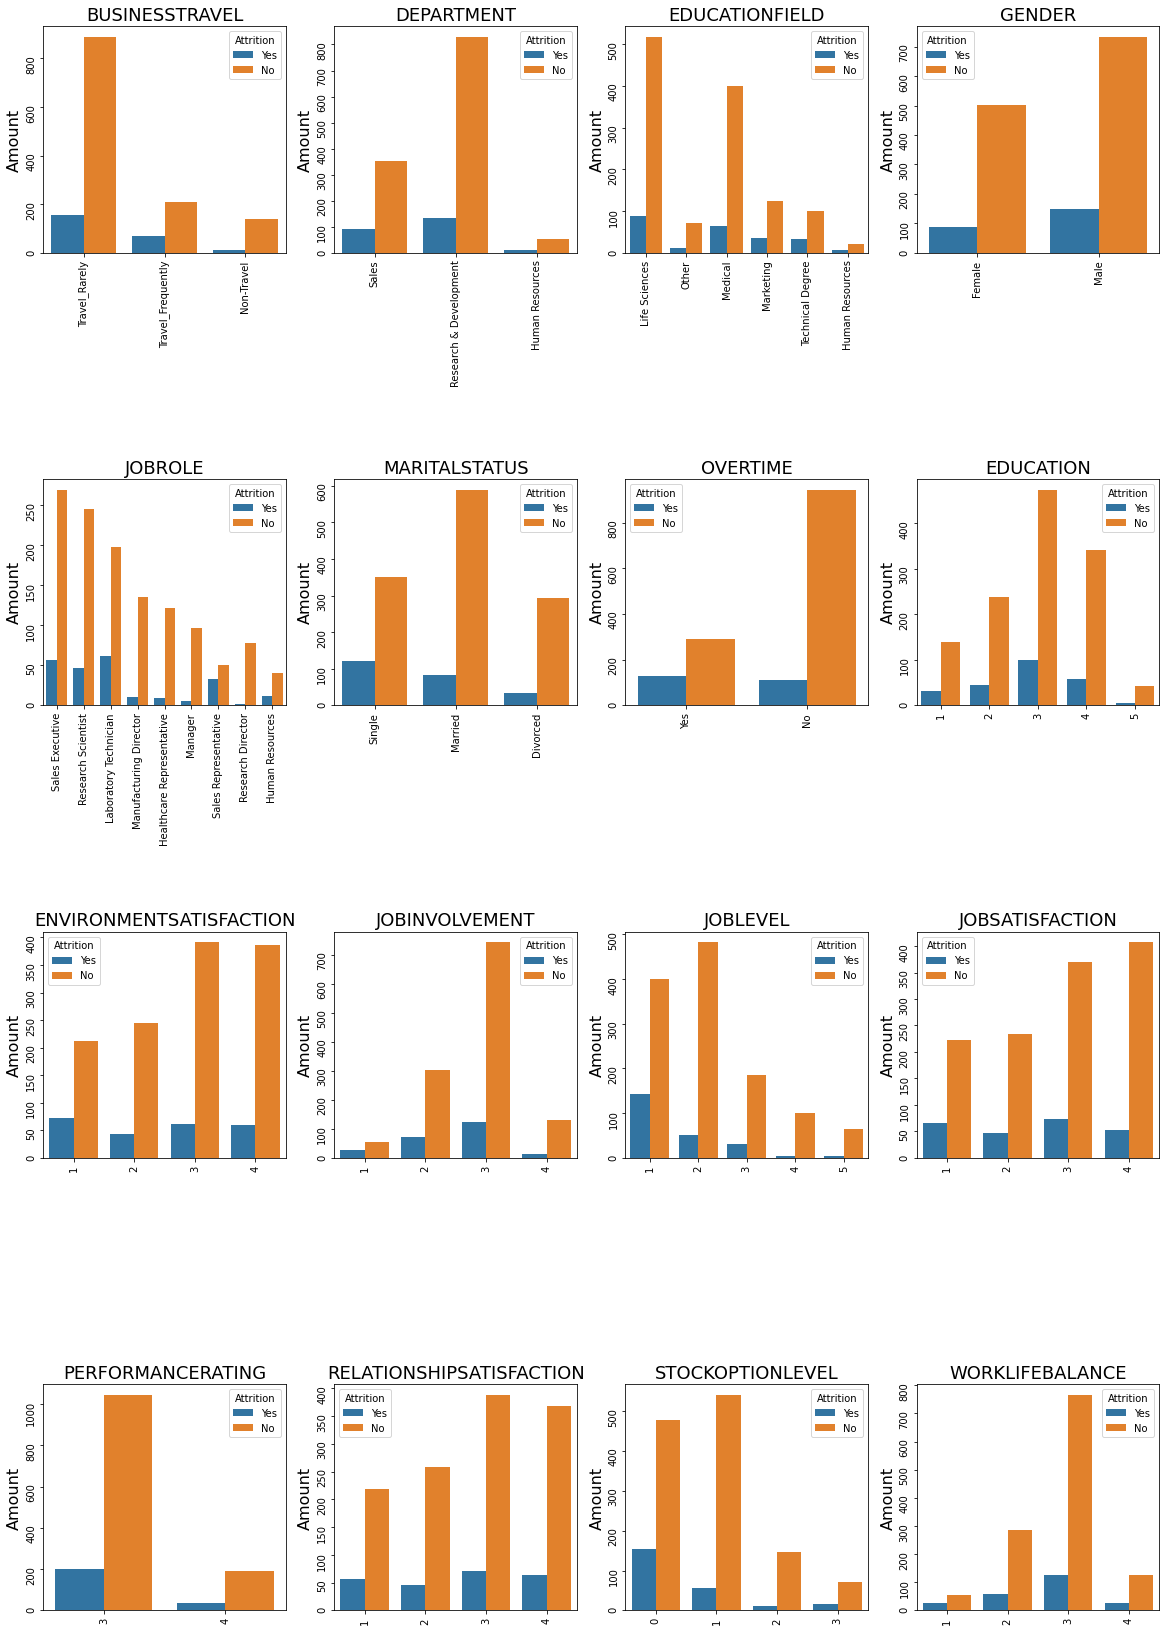

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,25))
fig.subplots_adjust(hspace=1, bottom=0)

for ax, catplot in zip(axes.flatten(), qualitative):
        sns.countplot(x=catplot, data=file, hue='Attrition', ax=ax)
        ax.set_title(catplot.upper(), fontsize=18)
        ax.set_ylabel('Amount', fontsize=16)
        ax.set_xlabel('')
        ax.tick_params(labelrotation=90)

In [29]:
eliminate2 = quantitative.copy()
eliminate2.extend(['Attrition', 'Over18','EmployeeCount', 'StandardHours', 'EmployeeNumber', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'])

In [30]:
df = file.drop(columns=eliminate2, axis=1)
df

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,Yes,3,1,0,1
1,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,No,4,4,1,3
2,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,Yes,3,3,0,3
4,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,No,3,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,2,Medical,3,Male,4,2,Laboratory Technician,4,Married,No,3,3,1,3
1466,Travel_Rarely,Research & Development,1,Medical,4,Male,2,3,Healthcare Representative,1,Married,No,3,1,1,3
1467,Travel_Rarely,Research & Development,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,Married,Yes,4,2,1,3
1468,Travel_Frequently,Sales,3,Medical,4,Male,2,2,Sales Executive,2,Married,No,3,4,0,2


In [31]:
arr = np.array(df.columns)

In [32]:
for col in arr:
    df[col] = df[col].astype('category')

In [33]:
df['BusinessTravel'].dtypes

CategoricalDtype(categories=['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], ordered=False)

In [34]:
cramersv = am.CramersV(df)
quali_data = cramersv.fit()

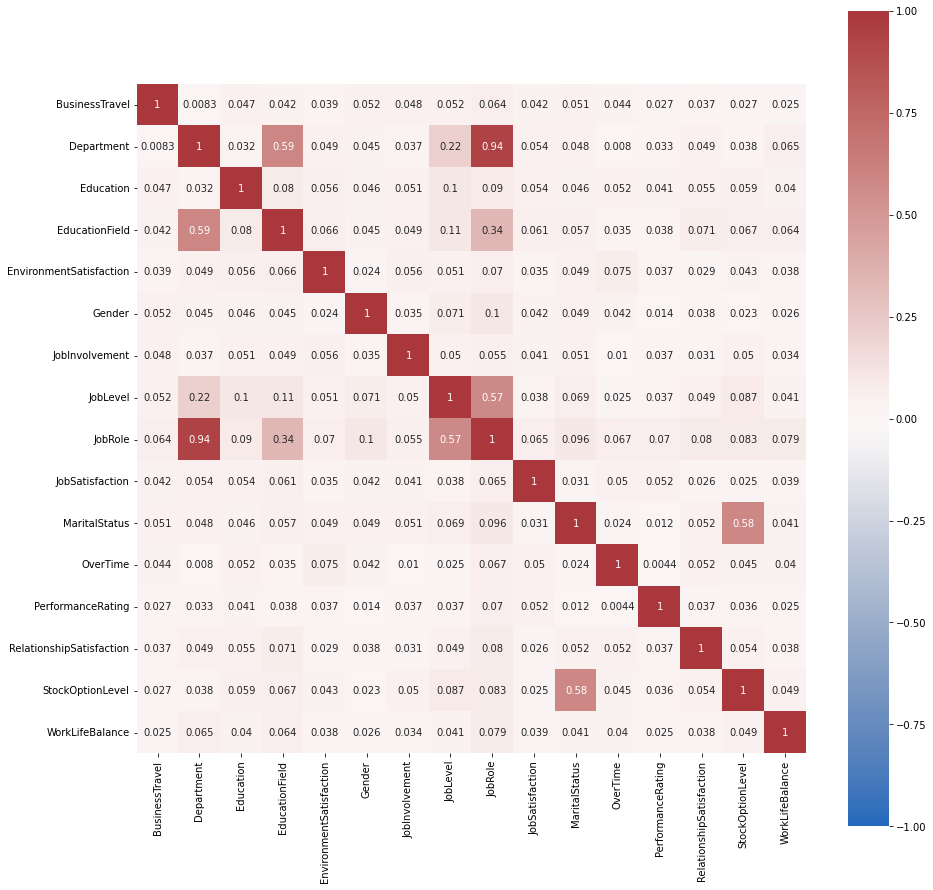

In [35]:
cmap = sns.color_palette("vlag", as_cmap = True)
plt.figure(figsize = (15, 15))
sns.heatmap(quali_data, annot = True, vmin = -1, vmax = 1, square = True, cmap = cmap)

In [49]:
#Eliminate 'Department'
qualitative.remove('Department')

In [37]:
len(qualitative)

15

**QUANTITATIVE & QUALITATIVE**

In [38]:
eliminate3 = ['Over18', 'Department','EmployeeCount', 'StandardHours', 'EmployeeNumber', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

In [39]:
map = phik.phik_matrix(file.drop(eliminate3, axis=1))

interval columns not set, guessing: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion']


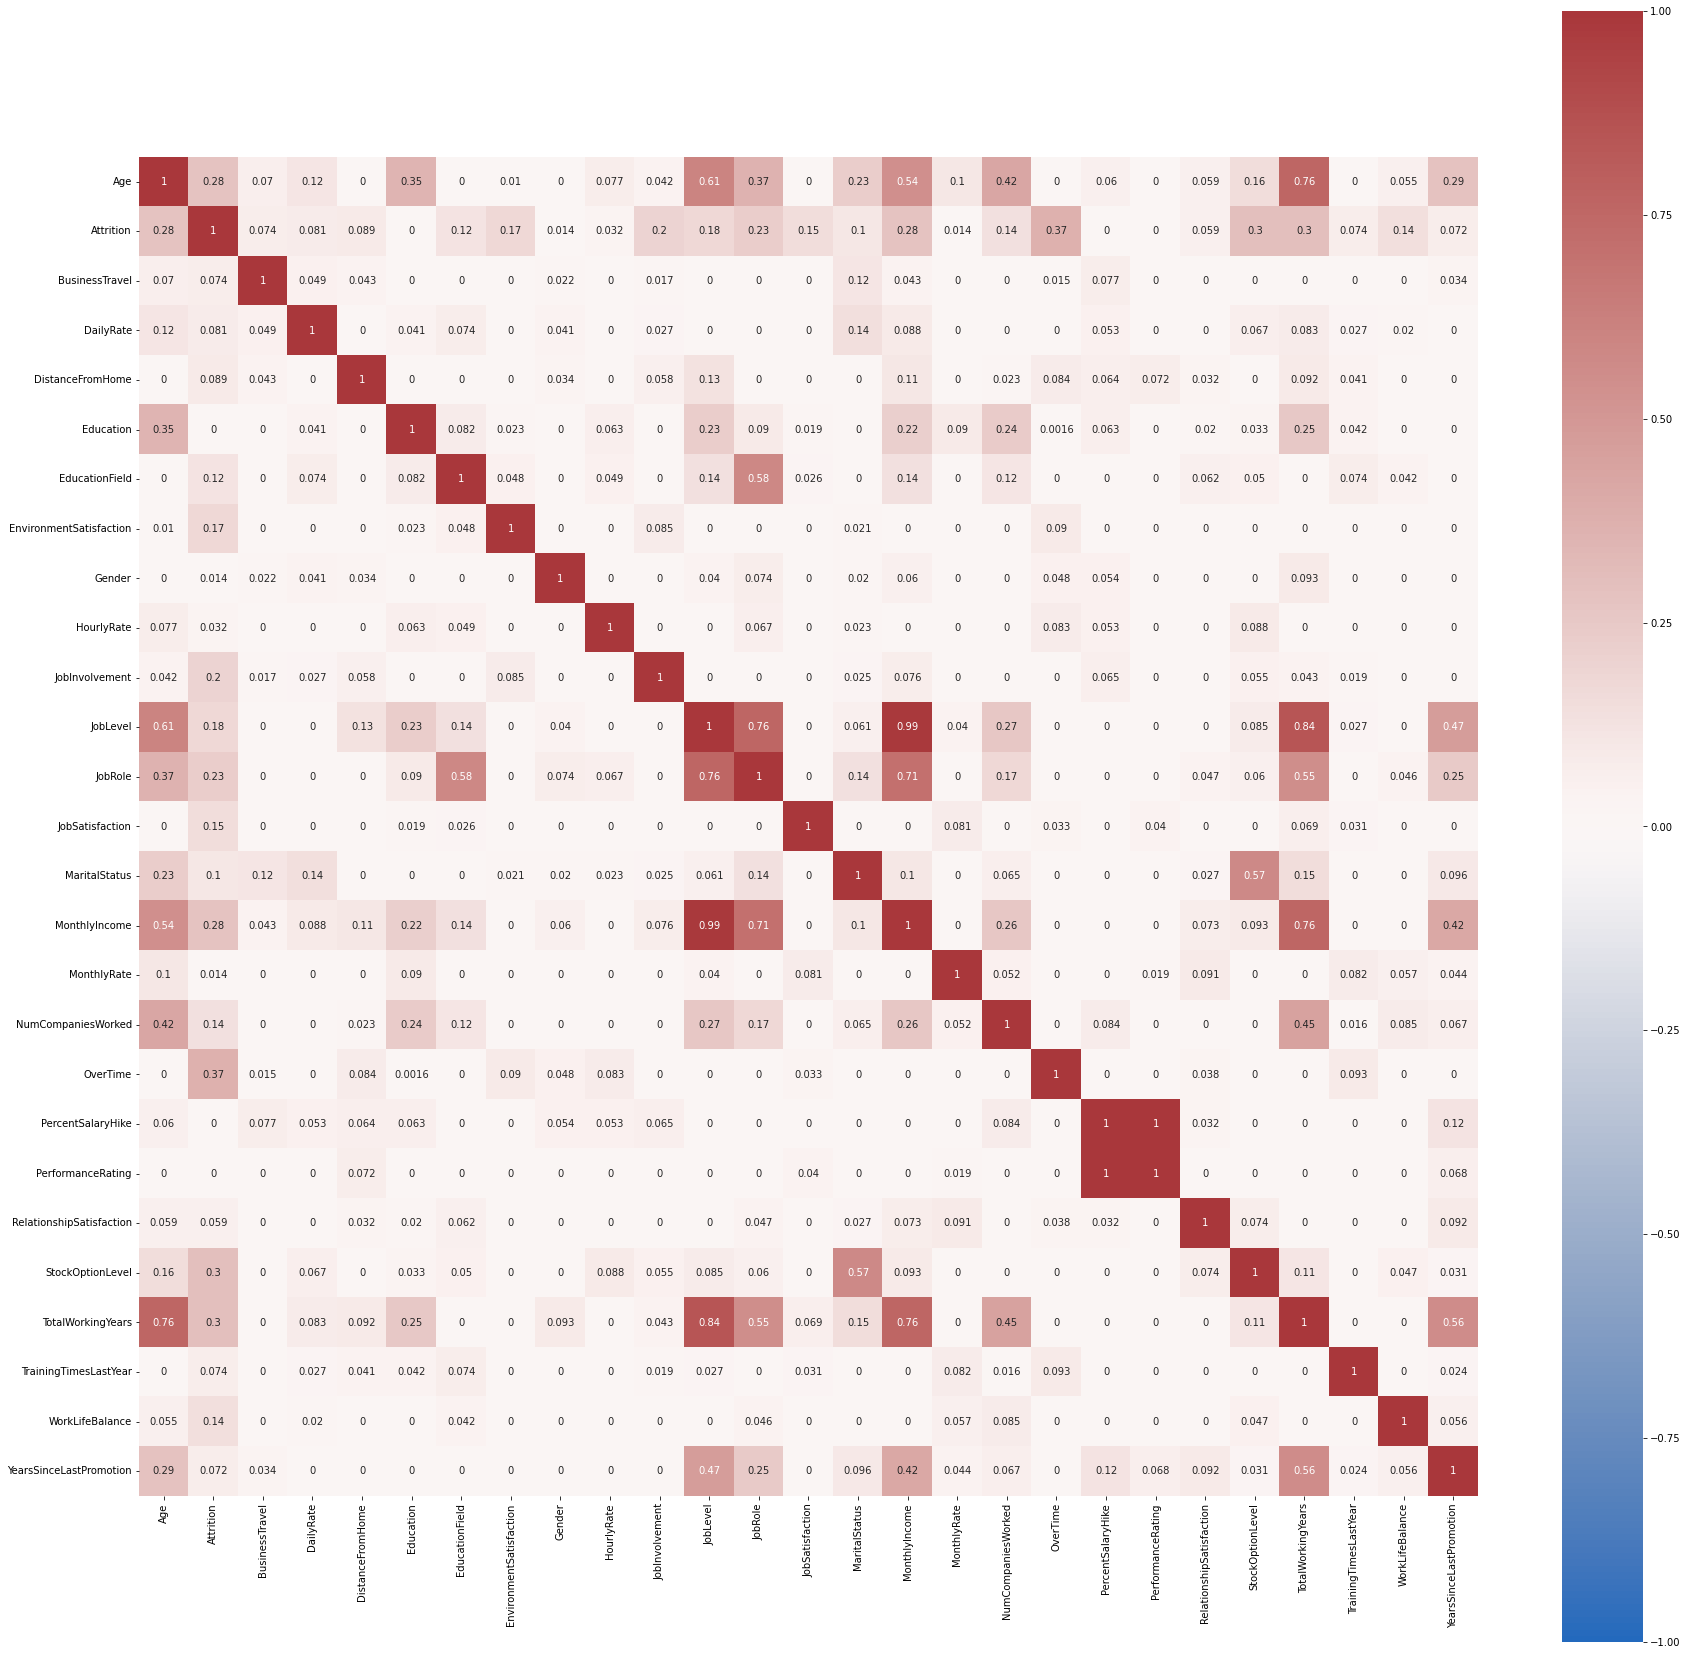

In [40]:
cmap = sns.color_palette("vlag", as_cmap = True)
plt.figure(figsize = (30, 30))
sns.heatmap(map, annot = True, vmin = -1, vmax = 1, square = True, cmap = cmap)

In [47]:
qualitative.remove('PerformanceRating')
qualitative.remove('JobLevel')

In [51]:
qualitative

['BusinessTravel',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [52]:
# List tổng hợp các attributes bỏ ra khỏi file
eliminatedList = ['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Department', 'PerformanceRating', 'JobLevel', 'TotalWorkingYears']
len(eliminatedList)

11

In [53]:
newfile = file.drop(eliminatedList, axis=1)

In [58]:
from sklearn import preprocessing

In [59]:
le = preprocessing.LabelEncoder()
encode_file = newfile.copy()
for i in qualitative:
  encode_file[i] = le.fit_transform(encode_file[i])
y = le.fit_transform(y)

In [ ]:
encode_file

In [70]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest()
print("Original feature shape:", encode_file.shape)
new_X = selector.fit_transform(X, y)
print("Transformed feature shape:", new_X.shape)

Original feature shape: (1470, 23)
Transformed feature shape: (1470, 10)


In [ ]:
data = np.array(encode_file.drop(['Attrition'], axis=1))
data

In [90]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5)
skf.get_n_splits(encode_file, y)
skf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
dataset = encode_file
skf = StratifiedKFold(n_splits=5)
model = LogisticRegression(solver='newton-cg')
x = dataset
y = dataset['Attrition']

def training(train, test, fold_no):
  x_train = train.drop(['Attrition'],axis=1)
  y_train = train['Attrition']
  x_test = test.drop(['Attrition'],axis=1)
  y_test = test['Attrition']
  model.fit(x_train, y_train)
  score = model.score(x_test,y_test)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(x, y):
  train = dataset.iloc[train_index,:]
  test = dataset.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


For Fold 1 the accuracy is 0.8639455782312925


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


For Fold 2 the accuracy is 0.8469387755102041


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


For Fold 3 the accuracy is 0.8571428571428571


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


For Fold 4 the accuracy is 0.8469387755102041
For Fold 5 the accuracy is 0.8673469387755102


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


In [ ]:
for train_index, test_index in skf.split(encode_file, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

In [80]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(encode_file)

In [81]:
np.shape(X)

(1470, 23)

In [83]:
from sklearn.decomposition import PCA
# define transform
pca = PCA(n_components=20)
# prepare transform on dataset
pca.fit(X)
# apply transform to dataset
X = pca.transform(X)

In [84]:
np.shape(X)

(1470, 20)

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state= 0)

In [86]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

Text(0.5, 257.44, 'Predicted label')

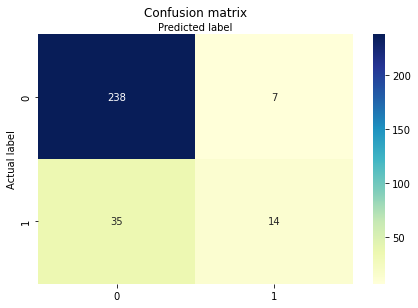

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred=logistic.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [88]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8571428571428571
Precision: 0.6666666666666666
Recall: 0.2857142857142857


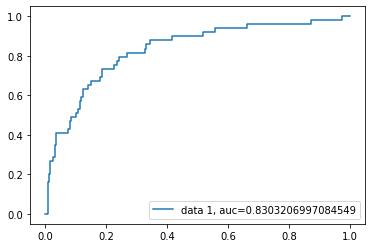

In [89]:
from sklearn.metrics import roc_curve,auc
y_pred_proba = logistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()